# Analysing the results of the directed search for ventilators

In [1]:
#importing relevant packages
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
from ema_workbench.analysis import parcoords

c:\users\pmg00\appdata\local\programs\python\python37\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)


## Epsilon Progress

In [11]:
epsilon_progress=pd.read_csv('./data/4000_convergence_ventilator.csv', delimiter = ',')
epsilon_progress = epsilon_progress.drop(['Unnamed: 0'], axis=1)
epsilon_progress

,epsilon_progress,nfe
0,0,0
1,8,100
2,14,1100
3,14,2100
4,15,3100


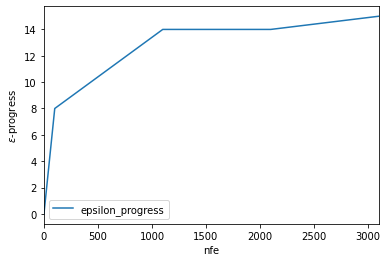

In [30]:
# gca stands for 'get current axis'
ax = plt.gca()

epsilon_progress.plot(kind='line',x='nfe',y='epsilon_progress',ax=ax)
ax.set_ylabel('$\epsilon$-progress')
plt.savefig("./figures/epsilonprogressVent.png")

## Investigating candiate policy

In [4]:
results=pd.read_csv('./data/4000_candidate_ventilator.csv', delimiter = ';', decimal= ",")
results = results.drop(['Unnamed: 0'], axis=1)
candidate_policy = results.drop(['Switch stockpile ventilators'], axis =1)
candidate_policy = candidate_policy.drop(['Coverage ventilator'], axis =1)

In [7]:
candidate_policy

,Switch procurement world market ventilator,Switch direct tender ventilators,Switch innovation process ventilator,Switch loaning ventilators,Switch domestic production ventilators,Direct tender set up time ventilator,Check up time,Delay domestic production setup ventilator,Delivery time of ventilators stockpiling,Procurement time ventilators worldwide,...,Shipment time to hospitals,Order buffer procurement world market vent,Order buffer direct tender vent,Order buffer domestic production,Order buffer innovation,Time to establish loaning process,Time horizon for forecast,Urgentness,Initial ventilators in stockpile,Government support
0,0,1,0,1,1,7.973928,7.253097,7.263243,1.076921,20.838938,...,1.002563,0.82236,1.399103,0.67371,0.971423,15.268815,21.837371,1.715718,6117.520616,0.079924


In [24]:
Order_buffer_vent = results.loc[:, ['Order buffer direct tender vent', 'Order buffer domestic production']].transpose()

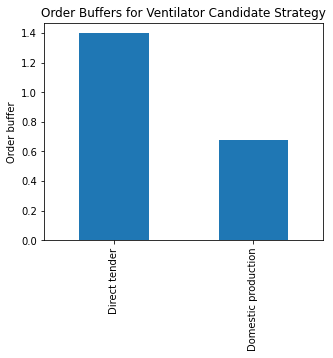

In [35]:
axes = Order_buffer_vent.plot.bar()
plt.title(label='Order Buffers for Ventilator Candidate Strategy')
axes.get_legend().remove()
axes.set_ylabel('Order buffer')
axes.set_xticklabels(['Direct tender', 'Domestic production'])
fig = plt.gcf()
fig.set_size_inches(5,4)
plt.savefig("./figures/OrderBufferVentCandidate.png")

plt.show()

In [51]:
candidate_policy.to_csv('./data/candidate_policy_step4_vent.csv')

In [50]:
candidate_policy

,Switch procurement world market ventilator,Switch direct tender ventilators,Switch innovation process ventilator,Switch loaning ventilators,Switch domestic production ventilators,Time to check products,Shipment time to hospitals,Order buffer procurement world market vent,Order buffer direct tender vent,Order buffer domestic production,Order buffer innovation,Time to establish loaning process,Time horizon for forecast,Urgentness,Initial ventilators in stockpile,Government support
0,1,1,0,1,1,1.009139,1.000069,2.894158,1.555492,1.946277,2.85452,7.133565,26.694541,3.874732,9142.388439,0.085847
